In [5]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# Import the time library and the datetime module from the datetime library
import time
from datetime import datetime
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [6]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [7]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [8]:
coordinates = list(lat_lngs)

In [9]:
from citipy import citipy

In [10]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

604

In [11]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1

    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | durazno
Processing Record 2 of Set 1 | samusu
City not found. Skipping...
Processing Record 3 of Set 1 | puerto ayora
Processing Record 4 of Set 1 | batagay-alyta
Processing Record 5 of Set 1 | kruisfontein
Processing Record 6 of Set 1 | tuktoyaktuk
Processing Record 7 of Set 1 | sitka
Processing Record 8 of Set 1 | neiafu
Processing Record 9 of Set 1 | atuona
Processing Record 10 of Set 1 | juneau
Processing Record 11 of Set 1 | lebu
Processing Record 12 of Set 1 | ushuaia
Processing Record 13 of Set 1 | punta arenas
Processing Record 14 of Set 1 | nueva guinea
Processing Record 15 of Set 1 | gorbehaza
Processing Record 16 of Set 1 | sile
Processing Record 17 of Set 1 | hilo
Processing Record 18 of Set 1 | roald
Processing Record 19 of Set 1 | cayenne
Processing Record 20 of Set 1 | avarua
Processing Record 21 of Set 1 | baghdad
Processing Record 22 of Set 1 | albany
Processing Record 23 of Set 

Processing Record 35 of Set 4 | alofi
Processing Record 36 of Set 4 | lasem
Processing Record 37 of Set 4 | inuvik
Processing Record 38 of Set 4 | ilulissat
Processing Record 39 of Set 4 | shemonaikha
Processing Record 40 of Set 4 | shestakovo
Processing Record 41 of Set 4 | torbay
Processing Record 42 of Set 4 | machiques
Processing Record 43 of Set 4 | kiruna
Processing Record 44 of Set 4 | dikson
Processing Record 45 of Set 4 | constitucion
Processing Record 46 of Set 4 | glace bay
Processing Record 47 of Set 4 | ketchikan
Processing Record 48 of Set 4 | mata
Processing Record 49 of Set 4 | tatarsk
Processing Record 50 of Set 4 | avera
Processing Record 1 of Set 5 | ibra
Processing Record 2 of Set 5 | westport
Processing Record 3 of Set 5 | mathbaria
Processing Record 4 of Set 5 | fukue
Processing Record 5 of Set 5 | krasnoselkup
Processing Record 6 of Set 5 | souillac
Processing Record 7 of Set 5 | mehamn
Processing Record 8 of Set 5 | katsuura
Processing Record 9 of Set 5 | mys sh

Processing Record 23 of Set 8 | umzimvubu
City not found. Skipping...
Processing Record 24 of Set 8 | wladyslawowo
Processing Record 25 of Set 8 | kamenka
Processing Record 26 of Set 8 | touros
Processing Record 27 of Set 8 | laem sing
Processing Record 28 of Set 8 | miraflores
Processing Record 29 of Set 8 | vostok
Processing Record 30 of Set 8 | fairbanks
Processing Record 31 of Set 8 | severnoye
Processing Record 32 of Set 8 | pimenteiras
Processing Record 33 of Set 8 | saint anthony
Processing Record 34 of Set 8 | roma
Processing Record 35 of Set 8 | san policarpo
Processing Record 36 of Set 8 | purpe
Processing Record 37 of Set 8 | magistralnyy
Processing Record 38 of Set 8 | sosva
Processing Record 39 of Set 8 | nagarote
Processing Record 40 of Set 8 | vallenar
Processing Record 41 of Set 8 | sakaiminato
Processing Record 42 of Set 8 | muros
Processing Record 43 of Set 8 | kedougou
Processing Record 44 of Set 8 | saint-pierre
Processing Record 45 of Set 8 | maldonado
Processing R

Processing Record 12 of Set 12 | batemans bay
Processing Record 13 of Set 12 | san joaquin
Processing Record 14 of Set 12 | karpogory
Processing Record 15 of Set 12 | honggang
Processing Record 16 of Set 12 | floro
Processing Record 17 of Set 12 | haibowan
City not found. Skipping...
Processing Record 18 of Set 12 | valley city
Processing Record 19 of Set 12 | bilma
Processing Record 20 of Set 12 | jinchengjiang
City not found. Skipping...
Processing Record 21 of Set 12 | kupang
Processing Record 22 of Set 12 | pisco
Processing Record 23 of Set 12 | itarema
Processing Record 24 of Set 12 | lazaro cardenas
Processing Record 25 of Set 12 | leningradskiy
Processing Record 26 of Set 12 | sinnamary
Processing Record 27 of Set 12 | paytug
City not found. Skipping...
Processing Record 28 of Set 12 | lajas
Processing Record 29 of Set 12 | rocha
Processing Record 30 of Set 12 | road town
Processing Record 31 of Set 12 | mecca
Processing Record 32 of Set 12 | cairns
Processing Record 33 of Set 1

In [16]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Durazno,-33.4131,-56.5006,90.73,23,51,13.85,UY,2023-01-10 22:22:30
1,Puerto Ayora,-0.7393,-90.3518,75.54,87,22,4.00,EC,2023-01-10 22:20:07
2,Batagay-Alyta,67.8006,130.4114,-38.33,96,96,1.32,RU,2023-01-10 22:18:28
3,Kruisfontein,-34.0033,24.7314,67.89,88,15,4.14,ZA,2023-01-10 22:22:31
4,Tuktoyaktuk,69.4541,-133.0374,-29.20,75,20,5.75,CA,2023-01-10 22:22:31
5,Sitka,57.0531,-135.3300,42.69,61,75,4.61,US,2023-01-10 22:22:32
6,Neiafu,-18.6500,-173.9833,83.08,83,75,10.36,TO,2023-01-10 22:22:32
7,Atuona,-9.8000,-139.0333,79.07,67,4,13.49,PF,2023-01-10 22:22:32
8,Juneau,58.3019,-134.4197,34.11,97,40,0.00,US,2023-01-10 22:18:40
9,Lebu,-37.6167,-73.6500,58.68,68,0,20.09,CL,2023-01-10 22:22:33


In [17]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
final_city_data_df = city_data_df[new_column_order]
final_city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Durazno,UY,2023-01-10 22:22:30,-33.4131,-56.5006,90.73,23,51,13.85
1,Puerto Ayora,EC,2023-01-10 22:20:07,-0.7393,-90.3518,75.54,87,22,4.00
2,Batagay-Alyta,RU,2023-01-10 22:18:28,67.8006,130.4114,-38.33,96,96,1.32
3,Kruisfontein,ZA,2023-01-10 22:22:31,-34.0033,24.7314,67.89,88,15,4.14
4,Tuktoyaktuk,CA,2023-01-10 22:22:31,69.4541,-133.0374,-29.20,75,20,5.75


In [18]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [19]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

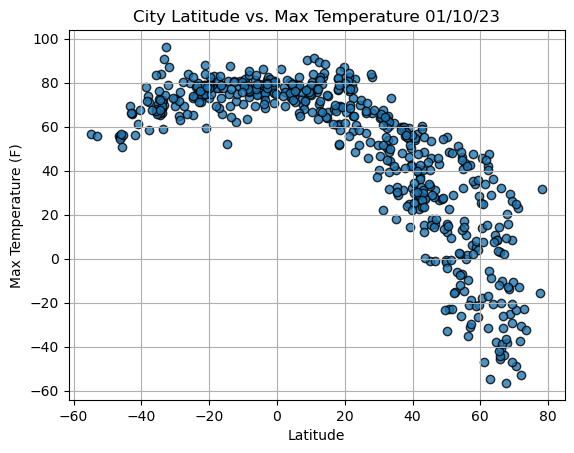

In [20]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

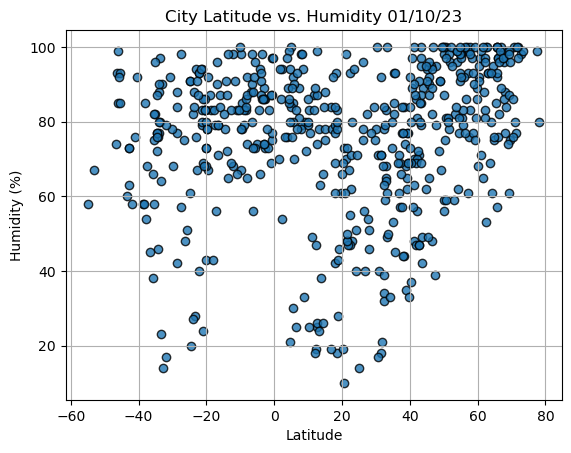

In [21]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

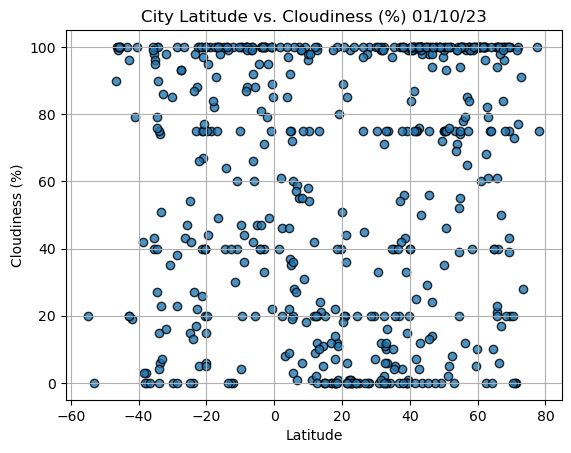

In [22]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

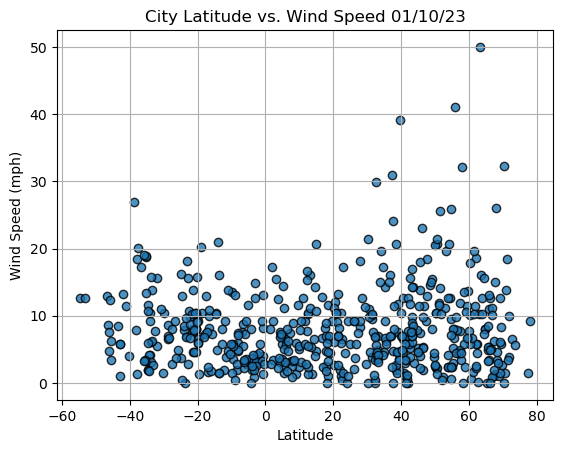

In [23]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()